In [1]:
import pandas as pd
import numpy as np

We create a random number generator titled 'die'. It is the sum of 2 dice, sampled 'trial' number of times.

In [8]:
die=pd.DataFrame([1,2,3,4,5,6])
trial=50
results=[die.sample(2,replace=True).sum().loc[0] for i in range(trial)]
print(results)
results[:10]

[4, 7, 10, 12, 7, 5, 8, 6, 8, 8, 4, 3, 11, 2, 8, 6, 6, 9, 6, 6, 8, 3, 8, 6, 10, 9, 7, 10, 4, 7, 6, 3, 10, 6, 7, 9, 6, 9, 7, 7, 9, 5, 7, 10, 11, 9, 7, 10, 9, 6]


[4, 7, 10, 12, 7, 5, 8, 6, 8, 8]

We can count the frequency of outcomes:

In [11]:
freq=pd.DataFrame(results)[0].value_counts()
sort_freq=freq.sort_index()
sort_freq

2      1
3      3
4      3
5      2
6     10
7      9
8      6
9      7
10     6
11     2
12     1
Name: 0, dtype: int64

In [12]:
freq
#freq is sorted by number of occurences, by default

6     10
7      9
9      7
10     6
8      6
4      3
3      3
11     2
5      2
12     1
2      1
Name: 0, dtype: int64

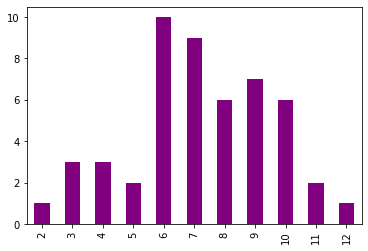

In [13]:
sort_freq.plot(kind='bar', color='purple')

We now compute the mean and variance.

In [14]:
# X_distri has bins 2-12, with a pre-selected number of instances in each bin (36 in total)
# this covers all possible outcomes of rolling 2 dice.
X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [16]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

In [17]:
print(mean,var)

6.999999999999998 5.833333333333333


In [20]:
#let us take a high number of trials, as this should be close to the theoretical probabilities
trial2 = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial2)]

In [21]:
results = pd.Series(results)
print(results.mean(), results.var())

6.9696 5.854568568428723


SCIPY can be used to generate cdfs and pdfs

In [22]:
from scipy.stats import norm

In [30]:
density=pd.DataFrame()
density['x']=np.arange(-4,4,.001)
density['pdf']=norm.pdf(density['x'],0,1)
density['cdf']=norm.cdf(density['x'],0,1)

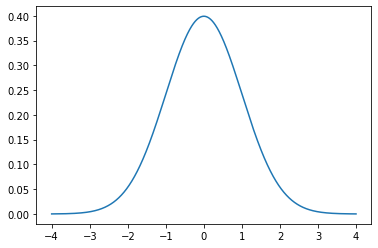

In [31]:
import matplotlib.pyplot as plt
plt.plot(density['x'],density['pdf'])

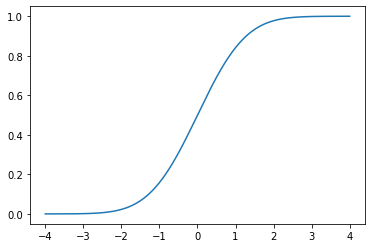

In [32]:
plt.plot(density['x'],density['cdf'])